In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [100]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [101]:
df.shape

(1025, 14)

In [102]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [103]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [105]:
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate
print("Training Accuracy:", dt.score(X_train, y_train))
print("Test Accuracy:", dt.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.9853658536585366


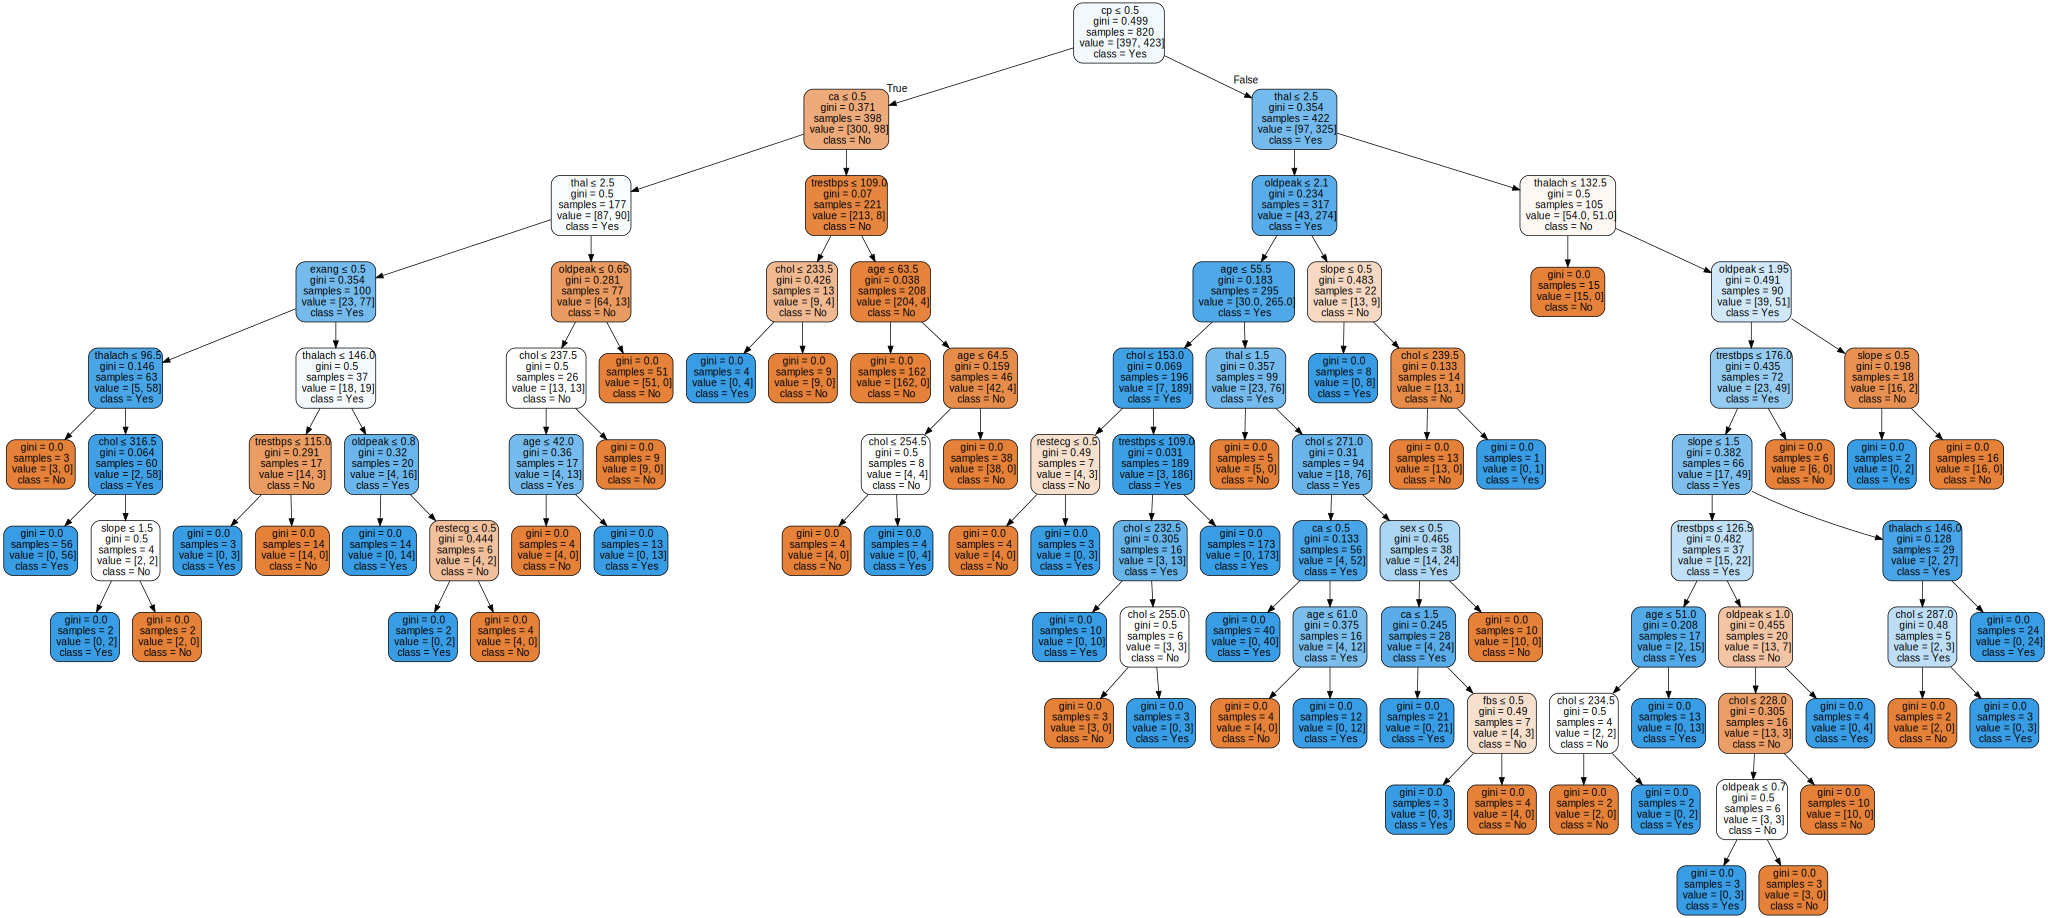

In [107]:
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # saves as decision_tree.pdf
graph

In [108]:
cv_scores_dt = cross_val_score(dt, X, y, cv=5)
print("Cross-validation scores (Decision Tree):", cv_scores_dt)
print("Mean CV Accuracy (Decision Tree):", cv_scores_dt.mean())

Cross-validation scores (Decision Tree): [1. 1. 1. 1. 1.]
Mean CV Accuracy (Decision Tree): 1.0


# Why this could be a problem (Overfitting)

Decision Trees are high-variance models.
They can easily memorize the training data—especially when:

The dataset is small, imbalanced, or not noisy.

The tree has no restrictions (e.g., unlimited depth).

Features allow the tree to split perfectly.

This means the model fits the data too well and may fail to generalize to unseen data.


# Analyze overfitting and control tree depth.



In [109]:
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)

print("Training Accuracy (limited):", dt_limited.score(X_train, y_train))
print("Test Accuracy (limited):", dt_limited.score(X_test, y_test))

Training Accuracy (limited): 0.8829268292682927
Test Accuracy (limited): 0.8


In [110]:
cv_scores_dt_limited = cross_val_score(dt_limited, X, y, cv=5)
print("Cross-validation scores (Decision Tree limited):", cv_scores_dt_limited)
print("Mean CV Accuracy (Decision Tree limited):", cv_scores_dt_limited.mean())

Cross-validation scores (Decision Tree limited): [0.84390244 0.83414634 0.87317073 0.80487805 0.81463415]
Mean CV Accuracy (Decision Tree limited): 0.8341463414634147


# Test Result

In [111]:

# Create a sample input (must match feature columns)
sample_input = pd.DataFrame(
    [[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]],
    columns=X_train.columns
)

# Generate prediction
prediction = dt_limited.predict(sample_input)

# Print the prediction
print("Prediction for the sample input:", prediction)

Prediction for the sample input: [0]


# Random Forest

In [112]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Training Accuracy:", rf.score(X_train, y_train))
print("Random Forest Test Accuracy:", rf.score(X_test, y_test))

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9853658536585366


In [113]:
# Create a sample input (must match feature columns)
sample_input = pd.DataFrame(
    [[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]],
    columns=X_train.columns
)

# Generate prediction using the Random Forest model
prediction = rf.predict(sample_input)

# Print the prediction
print("Prediction for the sample input (Random Forest):", prediction)

Prediction for the sample input (Random Forest): [0]


# Compare Results of Decision Tree & Random Forest

In [114]:
print("Decision Tree Test Accuracy:", dt_limited.score(X_test, y_test))
print("Random Forest Test Accuracy:", rf.score(X_test, y_test))

print("\nDecision Tree Mean CV Accuracy:", cv_scores_dt.mean())
print("Random Forest Mean CV Accuracy:", cv_scores.mean())

Decision Tree Test Accuracy: 0.8
Random Forest Test Accuracy: 0.9853658536585366

Decision Tree Mean CV Accuracy: 1.0
Random Forest Mean CV Accuracy: 0.9970731707317073


# Feature importances

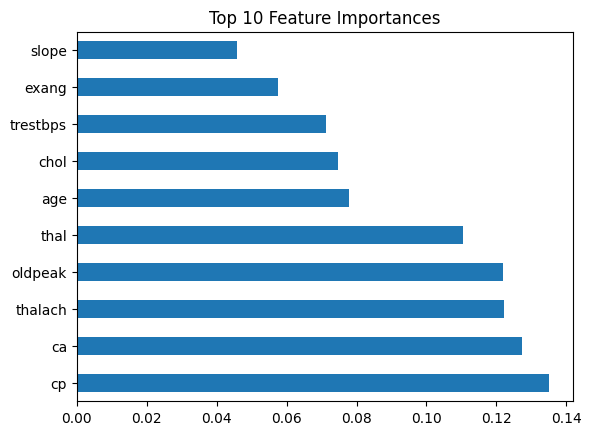

In [115]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [116]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073


In [117]:
print("Decision Tree Mean CV Accuracy:", cv_scores_dt_limited.mean())
print("Random Forest Mean CV Accuracy:", cv_scores.mean())

Decision Tree Mean CV Accuracy: 0.8341463414634147
Random Forest Mean CV Accuracy: 0.9970731707317073


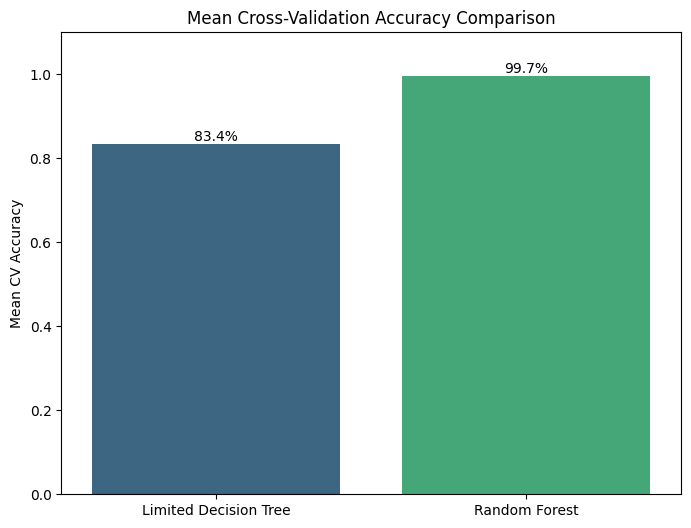

In [118]:
models = ['Limited Decision Tree', 'Random Forest']
mean_cv_accuracies = [cv_scores_dt_limited.mean(), cv_scores.mean()]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=models, y=mean_cv_accuracies, palette='viridis') # Using 'viridis' palette

# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title("Mean Cross-Validation Accuracy Comparison")
plt.ylabel("Mean CV Accuracy")
plt.ylim(0, 1.1) # Adjust y-limit to accommodate labels
plt.show()